# The Sparks Foundation - Data Science & Business Analytics Internship

# Task 1- Prediction using Supervised  Machine Learning

In task 1 we predict the percentage score of a student from the no. of hours studied using Linear Regression algorithm

# Step 1- Importing the Data
We use the given dataset and hence we import them first  

In [14]:
#importing the required libraries for the Task
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#To Ignore the Warnings

import warnings as wg
wg.filterwarnings("ignore")

In [15]:
#reading data from remote Link

url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [16]:
df.head()  #shows first 5 elements of the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
df.tail() #shows last 5 elements of the dataset

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [18]:
df.shape #gives the number of columns and rows
df.info   #provides information about our dataset

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [19]:
df.describe() #gives a overall briefing and calculations on the data 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [20]:
df.isnull().sum() #Finds the null values and returns the count as sum of null values in the dataset

Hours     0
Scores    0
dtype: int64

# Step 2- Visualizing The Dataset

We observe the different patterns and relations between the variables in the dataset visually by plotting it.

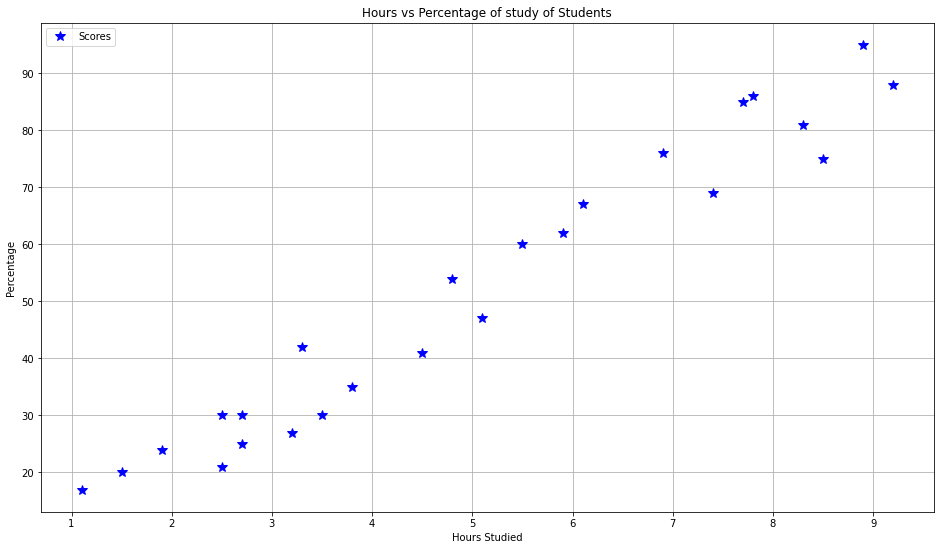

In [23]:
#plotting the dataset

df.plot(x='Hours',y='Scores',style='*',color='blue',markersize=10)
plt.title("Hours vs Percentage of study of Students")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage ")
plt.grid()
plt.show()

# From this grap we can observe a linear relation between x adn y variables.

Hence we use the Linear Regression supervised model on it for predicting the values Further.

In [24]:
df.corr()  # .corr is used to determine the corelation between the variables

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Step 3- Data Preparation
Here we divide the data into 'Features' and 'Labels' for classification. Then we split the dataset into 2 parts for Testing and Training.

In [25]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [26]:
# using  iloc function we divide the data into two parts
X=df.iloc[:,:1].values
y=df.iloc[:,1:].values

In [28]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [29]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [30]:
#splitting the Data into Training and Testing Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=0)

# Step 4- Training the Algorithm
After Splitting the dataset into training and Testing Dataset we now Train our model

In [31]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Step 5- Visualizing The Model
After the testing has been completed, now we Visualize it.

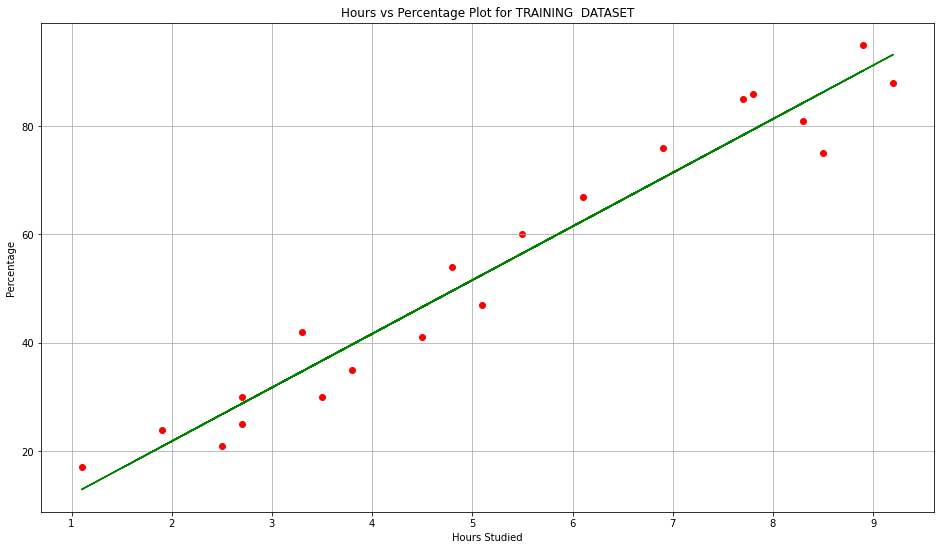

In [35]:
line=model.coef_*X+model.intercept_

#Plotting for the training data
plt.scatter(X_train,y_train,color='red')
plt.plot(X, line, color='green')
plt.title("Hours vs Percentage Plot for TRAINING  DATASET")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage ")
plt.grid()
plt.show()


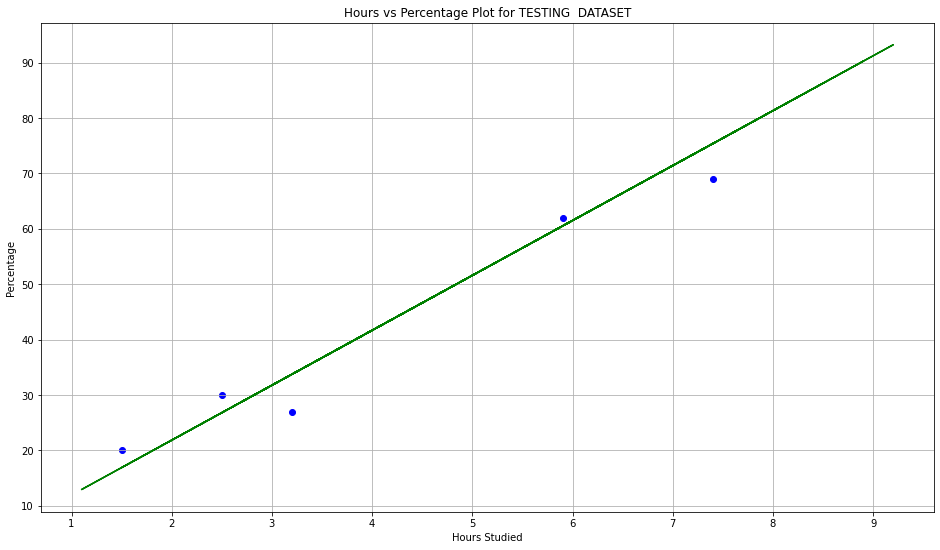

In [36]:
#Plotting for the testing data
plt.scatter(X_test,y_test,color='blue')
plt.plot(X, line, color='green')
plt.title("Hours vs Percentage Plot for TESTING  DATASET")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage ")
plt.grid()
plt.show()

# Step 6- Making Predictions
Once the Training is completed we now Predict 

In [37]:
print(X_test) #Testing Data- In hours
y_pred=model.predict(X_test) #Predicting the Scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [47]:
#Comparing Actual vs Predicted
print(y_test )
print(y_pred)
com=pd.DataFrame({'Actual':[y_test],'Predict':[y_pred]})
com

[[20]
 [27]
 [69]
 [30]
 [62]]
[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


,Actual,Predict
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [56]:
#Now we test with our own Data

hours=7
own_pred=model.predict([[hours]])
print("The predicted score when a student studies for ",hours, " hrs is ",own_pred)

The predicted score when a student studies for  7  hrs is  [[71.39275541]]


# Step 7- Evaluating a Model
In this Step we finally Evaluate the performance of our model

In [54]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
